# PART- 3 `( Handling With Outliers )`

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [217]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum columns
# pd.set_option('display.max_rows', None)

In [218]:
import re 

def get_diff_category_column(Series:pd.Series, exclude=''',/\n''', pattern=r'''[,\n]| /''', strip='''' "!?|.,*+-_/][''', diff_value=list()):  
    diff_value.clear()
    column = Series.dropna().apply(str).str.strip(strip)
    for row in column:
        if not any(x in exclude for x in row) and row not in diff_value:
            diff_value.append(row)
        else:
            for data in map(lambda x: x.strip(strip), filter(None, re.split(pattern, row))):
                if data not in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [219]:
df = pd.read_csv("auto_scout_filled.csv")
df.head().T

,0,1,2,3,4
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price_€,15770.0,14500.0,14640.0,14500.0,16790.0
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible
km,56013.0,80000.0,83450.0,73000.0,16200.0
hp_kW,66.0,141.0,85.0,66.0,66.0
type,Used,Used,Used,Used,Used
previous_owners,2.0,1.0,1.0,1.0,1.0
warranty,0.0,0.0,0.0,0.0,0.0
make,Audi,Audi,Audi,Audi,Audi
model,A1,A1,A1,A1,A1


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   body_type               15919 non-null  object 
 1   price_€                 15919 non-null  float64
 2   vat                     15919 non-null  object 
 3   km                      15919 non-null  float64
 4   hp_kW                   15919 non-null  float64
 5   type                    15919 non-null  object 
 6   previous_owners         15919 non-null  float64
 7   warranty                15919 non-null  float64
 8   make                    15919 non-null  object 
 9   model                   15919 non-null  object 
 10  body_color              15919 non-null  object 
 11  paint_type              15919 non-null  object 
 12  upholstery              15919 non-null  object 
 13  nr_of_doors             15707 non-null  float64
 14  nr_of_seats             14942 non-null

In [221]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_€,15919.0,18019.896727,7386.169409,13.0,12850.0,16900.0,21900.0,74600.0
km,15919.0,31964.846747,37069.923557,0.0,2000.0,20410.0,46898.5,317000.0
hp_kW,15919.0,88.372385,26.840256,1.0,66.0,85.0,101.0,294.0
previous_owners,15919.0,0.947170,0.394599,0.0,1.0,1.0,1.0,4.0
warranty,15919.0,0.304856,0.460361,0.0,0.0,0.0,1.0,1.0
nr_of_doors,15707.0,4.656077,0.645298,1.0,4.0,5.0,5.0,7.0
nr_of_seats,14942.0,4.949873,0.489872,2.0,5.0,5.0,5.0,7.0
engine_displacement_cc,15423.0,1423.540881,333.530658,1.0,1229.0,1461.0,1598.0,16000.0
cylinders,10239.0,3.797343,0.415382,1.0,4.0,4.0,4.0,8.0
weight_kg,8945.0,1351.106540,220.661532,1.0,1165.0,1288.0,1487.0,2471.0


In [222]:
def detect_outlier(col):
    print('column name : ',col)
    print("--"*20)
    Q1 = df[col].quantile(0.25)
    print("Q1 : ", Q1)
    Q3 = df[col].quantile(0.75)
    print("Q3 : ", Q3)
    IQR = Q3 - Q1
    print("IQR : ", IQR )
    lower_lim = Q1 - 1.5*IQR
    print("lower limit : ", lower_lim)
    print("mean : ", round(df[col].mean(), 2))
    print("median : ", round(df[col].median(), 2))
    upper_lim = Q3 +1.5*IQR
    print("upper limit : ", upper_lim)
    cnt_of_low = (df[col] < lower_lim).sum()
    print("count of lower values : ", cnt_of_low)
    cnt_of_upper = (df[col] > upper_lim).sum()
    print("count of upper values : ", cnt_of_upper)
    print(" ")
    print("the smallest 10 values :\n", df[col].sort_values().head(10))
    print(" ")
    print("the biggest 10 values :\n", df[col].sort_values(ascending = False).head(10))
    
    print("\n\n")

In [223]:
for i in df.select_dtypes(exclude="O").columns:
    detect_outlier(i)

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
lower limit :  -725.0
mean :  18019.9
median :  16900.0
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594       13.0
8828      120.0
6066      255.0
8829      331.0
8827     4950.0
8825     4990.0
8826     5250.0
8824     5300.0
13770    5445.0
8823     5450.0
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648     74600.0
15826    68320.0
3649     67600.0
3587     64900.0
15828    64332.0
15831    64298.0
3595     63900.0
15833    63477.0
3590     62900.0
3594     58990.0
Name: price_€, dtype: float64



column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
lower limit :  -65347.75
mean :  31964.85
median :  20410.0
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518    0.0
9892     0.0
2496     0.0
98

In [224]:
df_numeric = df.select_dtypes(include="number")

In [225]:
df_numeric.columns


Index(['price_€', 'km', 'hp_kW', 'previous_owners', 'warranty', 'nr_of_doors',
       'nr_of_seats', 'engine_displacement_cc', 'cylinders', 'weight_kg',
       'co2e_g', 'gears', 'consumption_comb', 'consumption_city',
       'consumption_country', 'age'],
      dtype='object')

In [226]:
def detect_values(col, col2):
    my_list = df[col].unique()
    for i in my_list:
        a = df[df[col] == i][col2].max()
        b = df[df[col] == i][col2].min()
        c = df[df[col] == i][col2].mean()
        print(f"{i} max : {a}   min : {b}   mean : {c}")

## 1. price_€

In [227]:
detect_outlier("price_€")

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
lower limit :  -725.0
mean :  18019.9
median :  16900.0
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594       13.0
8828      120.0
6066      255.0
8829      331.0
8827     4950.0
8825     4990.0
8826     5250.0
8824     5300.0
13770    5445.0
8823     5450.0
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648     74600.0
15826    68320.0
3649     67600.0
3587     64900.0
15828    64332.0
15831    64298.0
3595     63900.0
15833    63477.0
3590     62900.0
3594     58990.0
Name: price_€, dtype: float64





In [228]:
df.iloc[[8594, 8828, 6066, 8829]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
8594,Sedans,13.0,VAT deductible,123.0,66.0,Used,1.0,0.0,Opel,Corsa,Gold,Metallic,Cloth,3.0,5.0,Manual,1398.0,4.0,1141.0,NaN,Benzine,128.0,Euro 6d-TEMP,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.0,NaN,5.6,6.8,4.9,1.0
8828,Compact,120.0,VAT deductible,12.0,66.0,New,0.0,0.0,Opel,Corsa,Grey,Metallic,Cloth,5.0,5.0,Manual,999.0,3.0,1099.0,NaN,Benzine,107.0,Euro 6,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.0,Netherlands,4.6,5.6,4.1,0.0
6066,Station wagon,255.0,VAT deductible,5563.0,100.0,Used,1.0,0.0,Opel,Astra,Gold,Metallic,Cloth,5.0,5.0,Manual,1598.0,4.0,1403.0,NaN,Diesel,101.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.0,NaN,3.8,4.5,3.4,1.0
8829,Other,331.0,VAT deductible,10.0,66.0,New,0.0,0.0,Opel,Corsa,White,Metallic,Cloth,5.0,5.0,Manual,999.0,3.0,1163.0,NaN,Benzine,NaN,NaN,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.0,Netherlands,NaN,NaN,NaN,0.0


In [229]:
df.loc[df["price_€"] < 332.0,  ["price_€"]] = np.nan

In [230]:
df["price_€"].isnull().sum()

4

In [231]:
df["price_€"] = df.groupby(["make", "model", "body_type", "age"])["price_€"].apply(lambda x : x.fillna(round(x.mean(), 0)))

In [232]:
df.iloc[[8594, 8828, 6066, 8829]]["price_€"]

8594    10853.0
8828    13816.0
6066    16933.0
8829    12310.0
Name: price_€, dtype: float64

## 2. km

In [233]:
detect_outlier("km")

column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
lower limit :  -65347.75
mean :  31964.85
median :  20410.0
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518    0.0
9892     0.0
2496     0.0
9882     0.0
15668    0.0
5553     0.0
12512    0.0
5672     0.0
9929     0.0
7828     0.0
Name: km, dtype: float64
 
the biggest 10 values :
 9279     317000.0
3003     291800.0
5712     260000.0
6224     248000.0
15277    240000.0
10804    232000.0
6380     231879.0
6062     230928.0
6399     229500.0
10495    222346.0
Name: km, dtype: float64





<AxesSubplot:xlabel='km'>

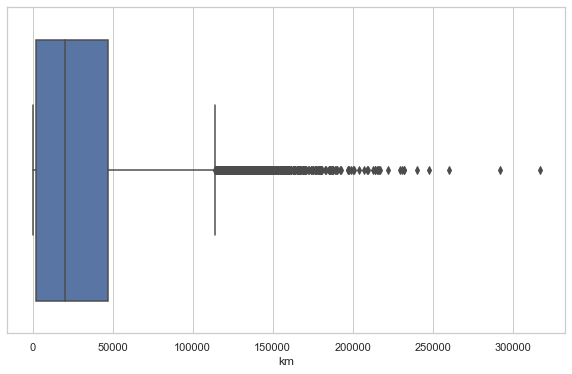

In [234]:
sns.boxplot(df.km)

In [235]:
df.groupby("age")["km"].mean()
df.groupby("age")["km"].min()
df.groupby("age")["km"].max()

age
0.0    127022.0
1.0    136000.0
2.0    317000.0
3.0    291800.0
Name: km, dtype: float64

<AxesSubplot:xlabel='km'>

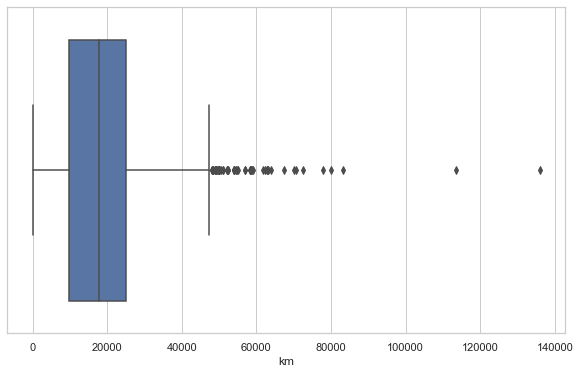

In [236]:
sns.boxplot(df[df.age == 1]["km"])

<AxesSubplot:xlabel='km'>

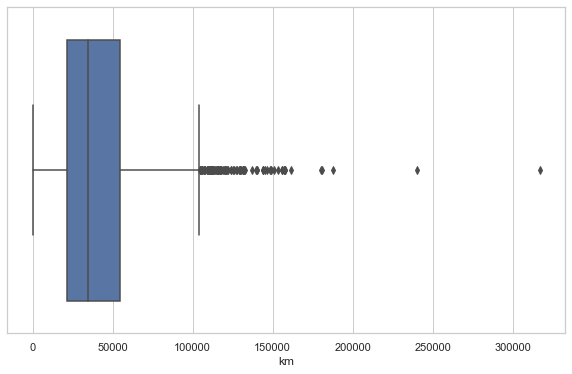

In [237]:
sns.boxplot(df[df.age == 2]["km"])

<AxesSubplot:xlabel='km'>

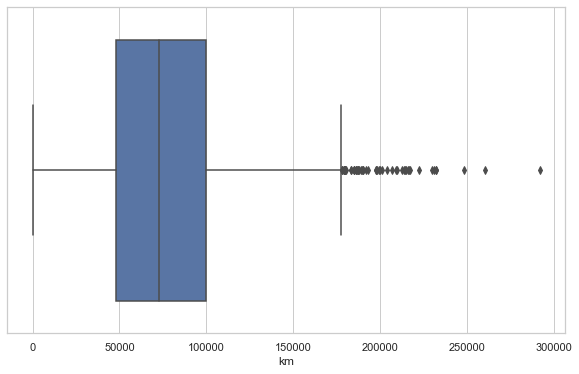

In [238]:
sns.boxplot(df[df.age == 3]["km"])

<AxesSubplot:xlabel='km'>

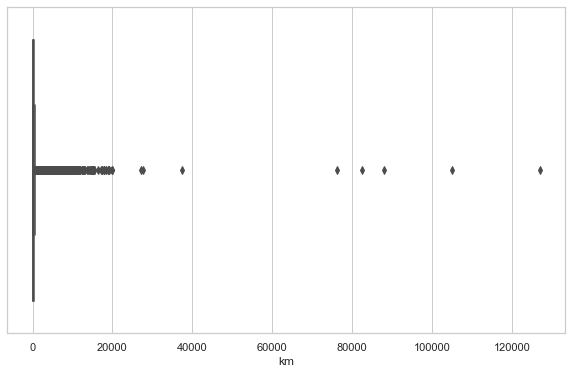

In [239]:
sns.boxplot(df[df.age == 0]["km"])

## 3. hp_kW

In [240]:
detect_outlier("hp_kW")

column name :  hp_kW
----------------------------------------
Q1 :  66.0
Q3 :  101.0
IQR :  35.0
lower limit :  13.5
mean :  88.37
median :  85.0
upper limit :  153.5
count of lower values :  22
count of upper values :  406
 
the smallest 10 values :
 6034    1.0
7019    1.0
7014    1.0
9285    1.0
6005    1.0
9287    1.0
9288    1.0
7018    1.0
9289    1.0
9290    1.0
Name: hp_kW, dtype: float64
 
the biggest 10 values :
 3595    294.0
3606    294.0
3587    294.0
3590    294.0
3592    294.0
3593    294.0
3596    294.0
3598    294.0
3599    294.0
3600    294.0
Name: hp_kW, dtype: float64





In [241]:
df["hp_kW"].sort_values(ascending=True).head(10)

6034    1.0
7019    1.0
7014    1.0
9285    1.0
6005    1.0
9287    1.0
9288    1.0
7018    1.0
9289    1.0
9290    1.0
Name: hp_kW, dtype: float64

In [242]:
df["hp_kW"].sort_values(ascending=False).head(20)

3595    294.0
3606    294.0
3587    294.0
3590    294.0
3592    294.0
3593    294.0
3596    294.0
3598    294.0
3599    294.0
3600    294.0
3601    294.0
3602    294.0
3604    294.0
3605    294.0
3603    294.0
3610    294.0
3648    294.0
3649    294.0
3608    270.0
3609    270.0
Name: hp_kW, dtype: float64

In [243]:
# the hp_kw values for opel corsa is min=33 max=155

In [244]:
df[df["hp_kW"] < 33.0][["make", "model"]].value_counts()

make     model   
Opel     Astra       7
         Corsa       7
         Insignia    4
Renault  Espace      2
Audi     A3          1
Renault  Clio        1
dtype: int64

In [245]:
df[df["hp_kW"] > 195][["make", "model"]].value_counts()

make  model   
Audi  A3          22
Opel  Insignia     1
dtype: int64

In [246]:
df.groupby(["make", "model", "drive_chain", "engine_displacement_cc"])["hp_kW"].apply(lambda x: x.fillna(x.median() if  x.median() > 1 else df["hp_kW"].median())).isnull().sum()

0

In [247]:
df["hp_kW"] = df.groupby(["make", "model", "drive_chain", "engine_displacement_cc"])["hp_kW"].apply(lambda x: x.fillna(x.median() if  x.median() > 1 else df["hp_kW"].median()))

## 4. previous_owners

In [248]:
detect_outlier("previous_owners")

column name :  previous_owners
----------------------------------------
Q1 :  1.0
Q3 :  1.0
IQR :  0.0
lower limit :  1.0
mean :  0.95
median :  1.0
upper limit :  1.0
count of lower values :  1659
count of upper values :  797
 
the smallest 10 values :
 2295     0.0
1697     0.0
12697    0.0
12696    0.0
12694    0.0
12693    0.0
12692    0.0
12691    0.0
12690    0.0
12689    0.0
Name: previous_owners, dtype: float64
 
the biggest 10 values :
 15256    4.0
972      4.0
14994    3.0
9478     3.0
10770    3.0
13560    3.0
1290     3.0
11443    3.0
13568    3.0
15007    3.0
Name: previous_owners, dtype: float64





In [249]:
df.previous_owners.sort_values(ascending=False)

15256    4.0
972      4.0
14994    3.0
9478     3.0
10770    3.0
        ... 
5441     0.0
2032     0.0
14744    0.0
2031     0.0
5624     0.0
Name: previous_owners, Length: 15919, dtype: float64

In [250]:
get_diff_category_column(df.previous_owners)

{0: '0.0', 1: '1.0', 2: '2.0', 3: '3.0', 4: '4.0'}

## 5. nr_of_doors

In [251]:
detect_outlier("nr_of_doors")

column name :  nr_of_doors
----------------------------------------
Q1 :  4.0
Q3 :  5.0
IQR :  1.0
lower limit :  2.5
mean :  4.66
median :  5.0
upper limit :  6.5
count of lower values :  220
count of upper values :  1
 
the smallest 10 values :
 13782    1.0
330      2.0
842      2.0
1451     2.0
1183     2.0
1184     2.0
1445     2.0
8701     2.0
8751     2.0
1440     2.0
Name: nr_of_doors, dtype: float64
 
the biggest 10 values :
 15202    7.0
10005    5.0
9994     5.0
9995     5.0
9996     5.0
9997     5.0
9998     5.0
9999     5.0
10000    5.0
10001    5.0
Name: nr_of_doors, dtype: float64





In [252]:
df.loc[(df.nr_of_doors == 1) | (df.nr_of_doors == 7), "nr_of_doors"] = 5

In [253]:
detect_outlier("nr_of_doors")

column name :  nr_of_doors
----------------------------------------
Q1 :  4.0
Q3 :  5.0
IQR :  1.0
lower limit :  2.5
mean :  4.66
median :  5.0
upper limit :  6.5
count of lower values :  219
count of upper values :  0
 
the smallest 10 values :
 8477    2.0
3124    2.0
281     2.0
1183    2.0
1184    2.0
273     2.0
9650    2.0
3152    2.0
1228    2.0
1229    2.0
Name: nr_of_doors, dtype: float64
 
the biggest 10 values :
 0        5.0
10020    5.0
9994     5.0
9995     5.0
9996     5.0
9997     5.0
9998     5.0
9999     5.0
10000    5.0
10001    5.0
Name: nr_of_doors, dtype: float64





## 5. nr_of_seats

In [254]:
detect_outlier("nr_of_seats")

column name :  nr_of_seats
----------------------------------------
Q1 :  5.0
Q3 :  5.0
IQR :  0.0
lower limit :  5.0
mean :  4.95
median :  5.0
upper limit :  5.0
count of lower values :  1242
count of upper values :  364
 
the smallest 10 values :
 13666    2.0
13918    2.0
13528    2.0
14507    2.0
13529    2.0
8679     2.0
13535    2.0
13536    2.0
8821     2.0
13611    2.0
Name: nr_of_seats, dtype: float64
 
the biggest 10 values :
 15484    7.0
15445    7.0
15410    7.0
15411    7.0
15414    7.0
15416    7.0
15420    7.0
15422    7.0
15426    7.0
15429    7.0
Name: nr_of_seats, dtype: float64





In [255]:
df[df["nr_of_seats"] == 7][["make", "model", "body_type"]].value_counts()

make     model   body_type    
Renault  Espace  Van              315
                 Station wagon     19
                 Transporter       16
                 Sedans             4
                 Off-Road           3
                 Other              3
                 Compact            2
dtype: int64

In [256]:
df[df["nr_of_seats"] == 2][["make", "model", "body_type"]].value_counts()

make     model     body_type    
Renault  Clio      Sedans           71
                   Transporter      26
                   Compact           8
Opel     Corsa     Transporter       4
Renault  Clio      Other             4
Opel     Corsa     Coupe             1
         Insignia  Station wagon     1
Renault  Clio      Van               1
dtype: int64

## 6. engine_displacement_cc

In [257]:
detect_outlier("engine_displacement_cc")

column name :  engine_displacement_cc
----------------------------------------
Q1 :  1229.0
Q3 :  1598.0
IQR :  369.0
lower limit :  675.5
mean :  1423.54
median :  1461.0
upper limit :  2151.5
count of lower values :  51
count of upper values :  23
 
the smallest 10 values :
 12796    1.0
12768    1.0
13904    1.0
12823    1.0
12790    1.0
14319    1.0
14284    1.0
12849    1.0
12848    1.0
12781    1.0
Name: engine_displacement_cc, dtype: float64
 
the biggest 10 values :
 10932    16000.0
7169     15898.0
10771     2967.0
3602      2480.0
3610      2480.0
3606      2480.0
3605      2480.0
3604      2480.0
3603      2480.0
3587      2480.0
Name: engine_displacement_cc, dtype: float64





In [258]:
df.loc[(df.engine_displacement_cc > 3000), "engine_displacement_cc"] = df.engine_displacement_cc/10

In [259]:
df.iloc[[10932, 7169]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
10932,Station wagon,14300.0,Price negotiable,76500.0,88.0,Used,1.0,0.0,Opel,Insignia,Grey,Metallic,Full leather,5.0,5.0,Manual,1600.0,NaN,NaN,front,Diesel,NaN,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,NaN,NaN,NaN,NaN,3.0
7169,Station wagon,18490.0,VAT deductible,22327.0,100.0,Employee's car,1.0,0.0,Opel,Astra,Green,Metallic,Cloth,5.0,5.0,Automatic,1589.8,4.0,NaN,front,Benzine,119.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,NaN,4.5,5.7,3.8,1.0


In [260]:
df.loc[(df.engine_displacement_cc < 800), "engine_displacement_cc"] = np.nan

In [261]:
df.groupby(["make", "model","cylinders", "hp_kW"])["engine_displacement_cc"].apply(lambda x : x.fillna(x.median()) if x.median() > 0 else df["engine_displacement_cc"].median()).isnull().sum()

0

In [262]:
df["hp_kW"] = df.groupby(["make", "model", "drive_chain", "engine_displacement_cc"])["hp_kW"].apply(lambda x: x.fillna(x.median() if  x.median() > 1 else df["hp_kW"].median()))

In [263]:
get_diff_category_column(df.engine_displacement_cc)

{0: '1000.0',
 1: '1100.0',
 2: '1149.0',
 3: '1195.0',
 4: '1197.0',
 5: '1198.0',
 6: '1199.0',
 7: '1200.0',
 8: '1229.0',
 9: '1239.0',
 10: '1248.0',
 11: '1300.0',
 12: '1333.0',
 13: '1350.0',
 14: '1364.0',
 15: '1368.0',
 16: '1369.0',
 17: '1390.0',
 18: '1395.0',
 19: '1396.0',
 20: '1397.0',
 21: '1398.0',
 22: '1399.0',
 23: '1400.0',
 24: '1422.0',
 25: '1461.0',
 26: '1490.0',
 27: '1495.0',
 28: '1496.0',
 29: '1498.0',
 30: '1499.0',
 31: '1500.0',
 32: '1533.0',
 33: '1568.0',
 34: '1580.0',
 35: '1584.0',
 36: '1589.0',
 37: '1589.8',
 38: '1596.0',
 39: '1598.0',
 40: '1599.0',
 41: '1600.0',
 42: '1618.0',
 43: '1686.0',
 44: '1696.0',
 45: '1798.0',
 46: '1800.0',
 47: '1856.0',
 48: '1896.0',
 49: '1956.0',
 50: '1968.0',
 51: '1984.0',
 52: '1995.0',
 53: '1997.0',
 54: '1998.0',
 55: '2000.0',
 56: '2480.0',
 57: '2967.0',
 58: '890.0',
 59: '898.0',
 60: '899.0',
 61: '900.0',
 62: '929.0',
 63: '973.0',
 64: '995.0',
 65: '996.0',
 66: '997.0',
 67: '998.0',


In [264]:
df.loc[df.engine_displacement_cc > 2500, "engine_displacement_cc" ] = 3.0
df.loc[df.engine_displacement_cc > 2000, "engine_displacement_cc" ] = 2.5
df.loc[df.engine_displacement_cc > 1800, "engine_displacement_cc" ] = 2.0
df.loc[df.engine_displacement_cc > 1600, "engine_displacement_cc" ] = 1.8
df.loc[df.engine_displacement_cc > 1500, "engine_displacement_cc" ] = 1.6
df.loc[df.engine_displacement_cc > 1400, "engine_displacement_cc" ] = 1.5
df.loc[df.engine_displacement_cc > 1300, "engine_displacement_cc" ] = 1.4
df.loc[df.engine_displacement_cc > 1200, "engine_displacement_cc" ] = 1.3
df.loc[df.engine_displacement_cc > 1100, "engine_displacement_cc" ] = 1.2
df.loc[df.engine_displacement_cc > 800, "engine_displacement_cc" ] = 1.0

In [265]:
df.engine_displacement_cc = df.engine_displacement_cc *1000

In [266]:
df.engine_displacement_cc.value_counts()

1600.0    4906
1000.0    2931
1400.0    2594
1500.0    1875
2000.0    1166
1300.0     790
1200.0     664
1800.0     425
2500.0      20
3000.0       1
Name: engine_displacement_cc, dtype: int64

## 7. cylinders

In [267]:
detect_outlier("cylinders")

column name :  cylinders
----------------------------------------
Q1 :  4.0
Q3 :  4.0
IQR :  0.0
lower limit :  4.0
mean :  3.8
median :  4.0
upper limit :  4.0
count of lower values :  2107
count of upper values :  27
 
the smallest 10 values :
 9956     1.0
15835    2.0
11342    2.0
2472     3.0
2477     3.0
2480     3.0
2481     3.0
2482     3.0
2483     3.0
2484     3.0
Name: cylinders, dtype: float64
 
the biggest 10 values :
 15055    8.0
535      8.0
10771    6.0
10826    6.0
12897    6.0
3608     5.0
3606     5.0
3604     5.0
3603     5.0
3602     5.0
Name: cylinders, dtype: float64





In [268]:
df[(df.cylinders == 1) | (df.cylinders==2)]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
9956,Compact,16625.0,VAT deductible,100.0,66.0,Pre-registered,1.0,0.0,Opel,Corsa,Black,Metallic,Cloth,3.0,5.0,Automatic,1400.0,1.0,1163.0,front,Benzine,140.0,Euro 6d-TEMP,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Sport suspension","ABS,Central door lock,Daytime running lights,D...",6.0,Germany,NaN,7.8,4.9,0.0
11342,Station wagon,21900.0,VAT deductible,13600.0,NaN,Employee's car,1.0,0.0,Opel,Insignia,Grey,Metallic,Part leather,5.0,5.0,Automatic,NaN,2.0,NaN,front,Diesel,NaN,NaN,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Touch screen,...","ABS,Central door lock with remote control,Driv...",6.0,Italy,NaN,NaN,NaN,1.0
15835,Van,47590.0,VAT deductible,6000.0,147.0,Employee's car,1.0,0.0,Renault,Espace,Black,Metallic,Full leather,5.0,7.0,Automatic,2000.0,2.0,1840.0,front,Diesel,139.0,Euro 6d-TEMP,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Hands-free equipment,On-board comput...",Voice Control,"ABS,Alarm system,Blind spot monitor,Central do...",6.0,Germany,5.3,6.2,4.7,0.0


In [269]:
df.loc[(df.cylinders ==1)|(df.cylinders ==2), "cylinders"] = 4.0

## 8. weight_kg

In [270]:
detect_outlier("weight_kg")

column name :  weight_kg
----------------------------------------
Q1 :  1165.0
Q3 :  1487.0
IQR :  322.0
lower limit :  682.0
mean :  1351.11
median :  1288.0
upper limit :  1970.0
count of lower values :  3
count of upper values :  75
 
the smallest 10 values :
 8355       1.0
12779      1.0
1143     102.0
8857     840.0
14313    900.0
13513    977.0
13555    977.0
14479    980.0
14654    980.0
13609    980.0
Name: weight_kg, dtype: float64
 
the biggest 10 values :
 15185    2471.0
14975    2471.0
15280    2471.0
15678    2471.0
15231    2471.0
10638    2450.0
10646    2450.0
15133    2410.0
15136    2410.0
15143    2410.0
Name: weight_kg, dtype: float64





In [271]:
df.groupby(["make", "model", "body_type"])["weight_kg"].value_counts().head(60)

make  model  body_type  weight_kg
Audi  A1     Compact    1180.0        86
                        1165.0        77
                        1200.0        65
                        1135.0        53
                        1195.0        40
                        1065.0        36
                        1110.0        22
                        1250.0        17
                        1105.0        12
                        1090.0         9
                        1215.0         9
                        1240.0         7
                        1035.0         6
                        1134.0         6
                        1155.0         5
                        1205.0         5
                        1275.0         5
                        1485.0         5
                        1225.0         4
                        1600.0         4
                        1115.0         3
                        1133.0         3
                        1230.0         3
                       

In [272]:
df.loc[df.weight_kg < 103, "weight_kg"] = np.nan

In [273]:
df.weight_kg = df.groupby(["make", "model", "body_type"])["weight_kg"].apply(lambda x:x.fillna(x.mean()))

## 9. co2e_g

In [274]:
detect_outlier("co2e_g")

column name :  co2e_g
----------------------------------------
Q1 :  104.0
Q3 :  129.0
IQR :  25.0
lower limit :  66.5
mean :  123.79
median :  116.0
upper limit :  166.5
count of lower values :  6
count of upper values :  236
 
the smallest 10 values :
 8110     14.0
3617     36.0
3612     36.0
3615     36.0
12547    45.0
9798     51.0
7857     80.0
13668    82.0
13518    82.0
13861    82.0
Name: co2e_g, dtype: float64
 
the biggest 10 values :
 11888    14457.0
12343    13983.0
8542     12324.0
6579     12087.0
5818     12087.0
6578     12087.0
4089      1060.0
4556       990.0
535        331.0
10513      253.0
Name: co2e_g, dtype: float64





In [275]:
df.co2e_g.value_counts().head(60)

120.0    740
99.0     545
97.0     537
104.0    501
102.0    477
103.0    445
114.0    382
124.0    372
107.0    362
108.0    362
119.0    361
106.0    349
128.0    329
126.0    282
85.0     275
118.0    270
110.0    266
127.0    257
117.0    254
111.0    237
113.0    235
109.0    234
139.0    224
140.0    218
129.0    213
135.0    202
105.0    202
92.0     198
130.0    180
123.0    178
150.0    174
143.0    171
112.0    171
95.0     161
116.0    157
141.0    156
98.0     151
133.0    145
136.0    145
137.0    133
125.0    132
134.0    130
145.0    126
149.0    117
153.0    113
147.0    109
101.0    105
132.0    100
115.0     86
122.0     83
121.0     82
138.0     75
93.0      66
168.0     58
142.0     58
131.0     48
148.0     48
144.0     40
154.0     40
94.0      37
Name: co2e_g, dtype: int64

In [276]:
from scipy.stats.mstats import winsorize

In [277]:
Q1 = df.co2e_g.quantile(0.25)
Q3 = df.co2e_g.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [278]:
a = len(df.co2e_g[df.co2e_g < lower_limit]) / len(df)
a

0.0003769080972422891

In [279]:
b = len(df.co2e_g[df.co2e_g > upper_limit]) / len(df)
b

0.01482505182486337

In [280]:
table_win = winsorize(df.co2e_g, (a,b))
table_win

masked_array(data=[ 99., 129.,  99., ..., 139., 139., 153.],
             mask=False,
       fill_value=1e+20)

In [281]:
df["co2e_g"] = pd.Series(table_win)

In [282]:
df["co2e_g"].sort_values()

7857     80.0
8110     80.0
3617     80.0
3612     80.0
12547    80.0
         ... 
15883     NaN
15903     NaN
15906     NaN
15908     NaN
15909     NaN
Name: co2e_g, Length: 15919, dtype: float64

<AxesSubplot:xlabel='co2e_g'>

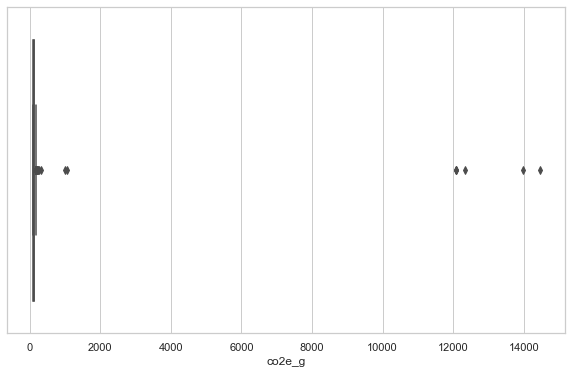

In [283]:
sns.boxplot(df.co2e_g)

## 10. gears

In [284]:
detect_outlier("gears")

column name :  gears
----------------------------------------
Q1 :  5.0
Q3 :  6.0
IQR :  1.0
lower limit :  3.5
mean :  5.92
median :  6.0
upper limit :  7.5
count of lower values :  5
count of upper values :  231
 
the smallest 10 values :
 8921     1.0
14375    1.0
9812     2.0
15817    3.0
15845    3.0
15823    4.0
15822    4.0
10259    5.0
10260    5.0
10261    5.0
Name: gears, dtype: float64
 
the biggest 10 values :
 14495    50.0
15824     9.0
15869     9.0
15827     9.0
15876     9.0
15814     9.0
15812     9.0
12028     8.0
11999     8.0
12008     8.0
Name: gears, dtype: float64





In [285]:
df[df.gears < 4][["make", "model"]]

,make,model
8921,Opel,Corsa
9812,Opel,Corsa
14375,Renault,Clio
15817,Renault,Espace
15845,Renault,Espace


In [286]:
df[df.make == "Corsa"].gears.value_counts()

Series([], Name: gears, dtype: int64)

In [287]:
df[df.make == "Renault"].gears.value_counts()

6.0     895
5.0     884
7.0     138
9.0       6
3.0       2
4.0       2
1.0       1
50.0      1
Name: gears, dtype: int64

In [288]:
df[df.make == "Opel"].gears.value_counts()

6.0    3483
5.0    1535
8.0     222
7.0       3
1.0       1
2.0       1
Name: gears, dtype: int64

In [289]:
df[df.make == "Audi"].gears.value_counts()

7.0    1767
6.0    1444
5.0     820
8.0       2
Name: gears, dtype: int64

In [290]:
df.loc[df.gears == 50, "gears"] = 5

In [291]:
df.loc[df.gears <= 4, "gears"] = np.nan

In [292]:
df.groupby(["make", "model", "body_type"])["gears"].apply(lambda x : x.fillna(x.mode()[0]))

KeyError: 0

## 11. consumption_comb

In [ ]:
df.drop(columns=["consumption_city", "consumption_country"], inplace=True)

In [ ]:
detect_outlier("consumption_comb")

In [ ]:
df.iloc[[13678]]

In [ ]:
df.iloc[[535]]

In [ ]:
df[df.consumption_comb < 3][["make", "model"]].value_counts()

In [ ]:
df.groupby(["make", "model", "body_type"])["consumption_comb"].median()

In [ ]:
df.consumption_comb.iloc[[13678]] 

In [ ]:
df.consumption_comb.iloc[[13678]] = 3.35

In [ ]:
df.consumption_comb.iloc[[13678]]

In [ ]:
df.consumption_comb.iloc[[535]] = 4.400

## 12. age

In [ ]:
detect_outlier("age")

In [ ]:
col_o = ['body_type','vat','type', 'previous_owners',
       'warranty', 'make', 'model', 'body_color', 'paint_type', 'upholstery',
       'gearing_type',
       'drive_chain', 'fuel', 
       'emission_class', 'comfort&convenience', 'entertainment&media',
       'extras', 'safety&security', 'country_version']

In [ ]:
def control_outlier(col) :
    print("column name : ",col)
    print("--"*20)
    print(get_diff_category_column(df[col]))
    print("**"*40)
    
    print("\n\n")

In [ ]:
for col in col_o:
    control_outlier(col)

In [ ]:
df.warranty.value_counts()

In [ ]:
sns.heatmap(df_numeric)

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [ ]:
df.to_csv("auto_scout_handling_outliers.csv", index=False)